In [15]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

csv_path = os.path.join('..', 'data', 'train_v9rqX0R.csv')
data = pd.read_csv(csv_path)

In [ ]:
# Data summary
data.head(2)
print("Total data samples:", len(data)) # 8523

# Id | Column                    | Type        | Data   | ToDo                 | X/y | Dim | processed 
#  1 | Item_Identifier           | Categorical | String | split text 1559->89  |  X  |  89 | ✓ 
#  2 | Item_Weight               | Numerical   | Float  | NaN/Normalize        |  X  |  01 | ✓
#  3 | Item_Fat_Content          | Categorical | String | map 5 -> 2           |  X  |  02 | ✓
#  4 | Item_Visibility           | Numerical   | Float  | Normalize            |  X  |  01 | ✓
#  5 | Item_Type                 | Categorical | String | too many ?           |  X  |  16 | ✓
#  6 | Item_MRP                  | Numerical   | Float  | Normalize            |  X  |  01 | ✓
#  7 | Outlet_Identifier         | Categorical | String | cant do much         |  X  |  10 | ✓
#  8 | Outlet_Establishment_Year | Numerical   | Int    | Normalize,try unnorm |  X  |  01 | ✓
#  9 | Outlet_Size               | Categorical | String | NaN                  |  X  |  03 | ✓
# 10 | Outlet_Location_Type      | Categorical | String | ordered numerical    |  X  |  01 | ✓
# 11 | Outlet_Type               | Categorical | String | ordered numerical    |  X  |  01 | ✓
# 12 | Item_Outlet_Sales         | Numerical   | Float  | Highly skewed        |  y  |  01 | x


Total data samples: 8523


In [82]:
#1 --------- Item_Identifier ---------
# Categorical Alphanumeric
# Total 1559 unique ids. Very high dimensional
print(f"Unique Item_Identifier:", len(pd.unique(data["Item_Identifier"])))
print(len(pd.unique(data["Item_Identifier"].str[0:2])))
print(len(pd.unique(data["Item_Identifier"].str[2:3])))
print(len(pd.unique(data["Item_Identifier"].str[3:])))
# Splitting will reduce the dimensions to 89
# ✓

Unique Item_Identifier: 1559
3
26
60


4.555
12.857645184135977
21.35


C:\Users\miu3kor\AppData\Local\Temp\ipykernel_24032\13185969.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


8523
8519


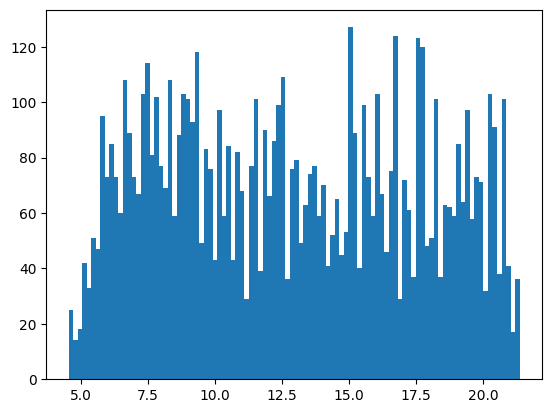

In [ ]:
#2 --------- Item_Weight ---------
# Numerical Float
print(np.min(data["Item_Weight"])) # 4.555
print(np.mean(data["Item_Weight"])) # 12.857645184135977
print(np.max(data["Item_Weight"])) # 21.35
plt.hist(data["Item_Weight"], bins=100)
# Distribution is not skewed nor is it centered around a value.
pd.unique(data["Item_Weight"].isna())
# Has NaNs
len(data[data["Item_Weight"].isna()])
# 1463 rows have NaN. Simply dropping them is not a solution.
data['Item_Weight'] = data.groupby('Item_Identifier')['Item_Weight'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)
# only 4 are left. Drop them.
print(len(data))
data.dropna(subset=['Item_Weight'],inplace=True)
print(len(data))
# ✓

In [84]:
#3 --------- Item_Fat_Content ---------         
# Categorical Text
print(f"Unique Item_Fat_Content:", pd.unique(data["Item_Fat_Content"]))
# Item_Fat_Content: only 2 categories. ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
# We can map it using some dict
# ✓

Unique Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


0.0
0.06613202877895107
0.328390948
Fraction below 0.2: 0.98


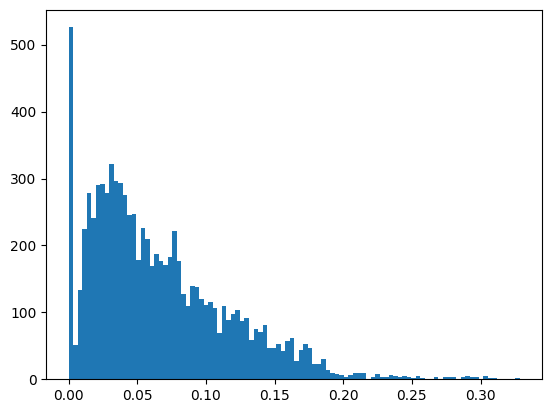

In [85]:
#4 --------- Item_Visibility ---------         
# Numerical float positive value.
# Normalize it to range from 0 to 1 to match the scaling with other features.
print(np.min(data["Item_Visibility"])) # 0.0
print(np.mean(data["Item_Visibility"])) # 0.06613202877895107
print(np.max(data["Item_Visibility"])) # 0.328390948
plt.hist(data["Item_Visibility"], bins=100)
# histogram is mostly populated near zero. May be we can clip higher values to max 0.2
threshold = 0.2
fraction_below = (data["Item_Visibility"] < threshold).mean()
print(f"Fraction below {threshold}: {fraction_below:.2f}")
# ✓


In [ ]:
#  5 --------- Item_Type ---------
# Categorical String
# too many (16) ? Can we merge some ?
# ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
#  'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
#  'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
#  'Others' 'Seafood']
print(f"Unique Item_Type:", len(pd.unique(data["Item_Type"])))
unique_item_ids = pd.unique(data["Item_Identifier"])
for id in unique_item_ids:
    item_types = pd.unique(data["Item_Type"][data["Item_Identifier"] == id])
    if len(item_types) > 1:
        print(item_types)
    # No item is mapped to multiple type. Cant merge with this logic.
data["Item_Type"].value_counts()
# None of them are close to zero so cant merge with this logic too.
# --

Unique Item_Type: 16


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

31.29
140.9927819781767
266.8884


(array([ 36.,  84., 121., 111.,  99.,  98., 116.,  97.,  82.,  79., 110.,
         95.,  79.,  76.,  55.,   3.,   1.,  18.,  63.,  73.,  75.,  70.,
         98., 106., 128.,  90., 125., 115., 115., 131., 117., 116., 119.,
        140., 128., 124., 108., 127., 159., 110., 119.,  91.,  60.,  25.,
          0.,  14., 116., 123., 131., 125., 122., 129., 113., 108., 108.,
        106., 118.,  89.,  79., 126., 119., 123., 140., 119., 121., 122.,
        117., 122., 104., 113., 144.,  50.,   1.,   3.,  29.,  39.,  63.,
         57.,  47.,  47.,  52.,  59.,  60.,  68.,  64.,  67.,  45.,  37.,
         57.,  48.,  41.,  53.,  58.,  48.,  71.,  68.,  62.,  68.,  82.,
         36.]),
 array([ 31.29    ,  33.645984,  36.001968,  38.357952,  40.713936,
         43.06992 ,  45.425904,  47.781888,  50.137872,  52.493856,
         54.84984 ,  57.205824,  59.561808,  61.917792,  64.273776,
         66.62976 ,  68.985744,  71.341728,  73.697712,  76.053696,
         78.40968 ,  80.765664,  83.121648,  8

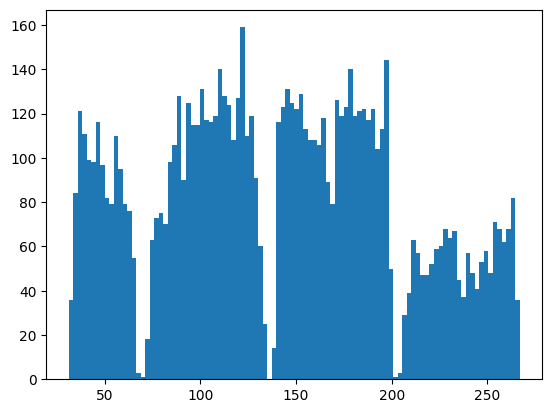

In [ ]:
# 6 --------- Item_MRP --------- 
# Numerical Float
print(np.min(data["Item_MRP"])) # 31.29
print(np.mean(data["Item_MRP"])) # 140.9927819781767
print(np.max(data["Item_MRP"])) # 266.8884
plt.hist(data["Item_MRP"], bins=100)
# Normalize the values
# Distribution is not skewed.
# ✓

In [86]:
#7 --------- Outlet_Identifier ---------       
# Categorical String 
# Has 10 unique categories.
# cant do much 
print(f"Unique Outlet_Identifier:", pd.unique(data["Outlet_Identifier"]))
# ✓

Unique Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [ ]:
#  8 --------- Outlet_Establishment_Year ---------
# Numerical Int
# Distinct 9 years. 1999 2009 1998 1987 1985 2002 2007 1997 2004
# Since year is a continuous value, we can simply normalize it instead of treating it as category.
# This reduces dimensionality.
print(f"Unique Outlet_Establishment_Year:", len(pd.unique(data["Outlet_Establishment_Year"])))
print(np.min(data["Outlet_Establishment_Year"]))
print(np.max(data["Outlet_Establishment_Year"]))
# ✓

Unique Outlet_Establishment_Year: 9
1985
2009


In [42]:
#9 --------- Outlet_Size ---------
# Categorical String
# Categories ['Medium' 'High' 'Small']. 
print(f"Unique Outlet_Size:", pd.unique(data["Outlet_Size"]))
# Has NaN. 2410 rows. Cant simply drop them.
nan_outlets = pd.unique(data["Outlet_Identifier"][data["Outlet_Size"].isna()])
print(len(data["Outlet_Identifier"][data["Outlet_Size"].isna()]))
# Only 3 outlets 'OUT010', 'OUT045', 'OUT017' have size NaN. We can just copy from valid rows.
print(pd.unique(data["Outlet_Size"][
     (data['Outlet_Type']=='Grocery Store')]))
#print(data[data["Outlet_Identifier"] == 'OUT045'][['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])
#OUT010  Tier 3  Grocery Store
#OUT045 Tier 2  Supermarket Type1
#OUT017 Tier 2  Supermarket Type1
# Every Tier 2  Supermarket Type1 combination is Small
# Every Grocery Store is Small
data["Outlet_Size"][data["Outlet_Identifier"]=='OUT045'] = 'Small'
data["Outlet_Size"][data["Outlet_Identifier"]=='OUT017'] = 'Small'
data["Outlet_Size"][data["Outlet_Identifier"]=='OUT010'] = 'Small'
print(len(data["Outlet_Identifier"][data["Outlet_Size"].isna()]))
# ✓

Unique Outlet_Size: ['Medium' 'Small' 'High']
0
['Small']
0


C:\Users\miu3kor\AppData\Local\Temp\ipykernel_24032\3947101747.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Size"][data["Outlet_Identifier"]=='OUT045'] = 'Small'
C:\Users\miu3kor\AppData\Local\Temp\ipykernel_24032\3947101747.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Size"][data["Outlet_Identifier"]=='OUT017'] = 'Small'
C:\Users\miu3kor\AppData\Local\Temp\ipykernel_24032\3947101747.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
# 10 --------- Outlet_Location_Type ---------
# Categorical String
print(f"Unique Outlet_Location_Type:", len(pd.unique(data["Outlet_Location_Type"])))
# Outlet_Location_Type. 3 categories. Try both Categ & numer ['Tier 1' 'Tier 3' 'Tier 2']
# try numerical ordered not one hot encoding to reduce dimensionality
# ✓

Unique Outlet_Location_Type: 3


In [ ]:

#11 Outlet_Type
print(f"Unique Outlet_Type:", len(pd.unique(data["Outlet_Type"])))
for outlet in pd.unique(data["Outlet_Identifier"]):
    outlet_types = pd.unique(data["Outlet_Type"][data["Outlet_Identifier"]==outlet])
    if len(outlet_types) > 1:
        print(outlet, outlet_types)
    # No mapping to multiple types.

# Unique 4 catogories. ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store' 'Supermarket Type3']
# Assuming Grocery stores are smaller than Supermarket, we can assign 0,1,2,3 to these categories.
# This will reduce dimensionality.
# ✓

Unique Outlet_Type: 4


33.29
2181.288913575032
13086.9648


(array([322., 397., 337., 359., 338., 346., 273., 310., 274., 324., 272.,
        297., 286., 276., 246., 250., 198., 209., 196., 218., 198., 194.,
        181., 182., 156., 142., 128., 119., 121., 106.,  94.,  84.,  90.,
         88.,  84.,  74.,  68.,  53.,  52.,  42.,  65.,  42.,  40.,  41.,
         38.,  38.,  27.,  25.,  24.,  19.,  17.,  20.,  14.,  12.,  20.,
         10.,   9.,  11.,   6.,   5.,   6.,   4.,   7.,   2.,   6.,   1.,
          1.,   3.,   3.,   3.,   4.,   2.,   3.,   2.,   1.,   0.,   1.,
          0.,   3.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   33.29    ,   163.826748,   294.363496,   424.900244,
          555.436992,   685.97374 ,   816.510488,   947.047236,
         1077.583984,  1208.120732,  1338.65748 ,  1469.194228,
         1599.730976,  1730.267724,  1860.804472,  1991.34122 ,
         2121.877968,  2252.414716,  2382.951464,  2513.488212

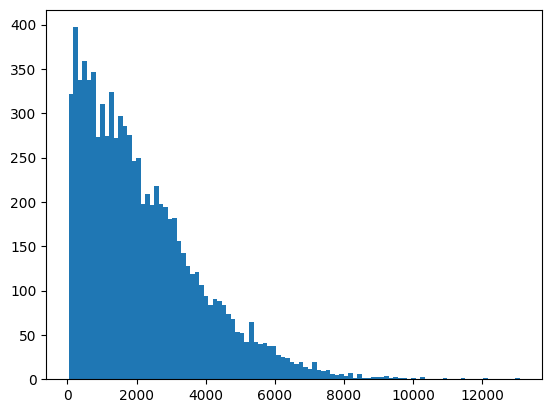

In [ ]:
# 12 --------- Item_Outlet_Sales ---------
# Numerical Float 
# Normalize  
# This column is output  y  
print(np.min(data["Item_Outlet_Sales"])) # 33.29
print(np.mean(data["Item_Outlet_Sales"])) # 2181.288913575032
print(np.max(data["Item_Outlet_Sales"])) # 13086.9648
plt.hist(data["Item_Outlet_Sales"], bins=100)
# Data is heavily skewed towards zero. May not be easy to predict high values.
# Simple min max normalization might result in lot of low values in the y.
# --